## TASK 1- DATA SCIENCE AND BUSSINESS ANALYTICS INTERNSHIP
### By: RAVI KANT SHARMA Intern at The Spark Foundation

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"D:\Data Analyst\JOB-A-THON\Student_Scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Outlier Removal

In [10]:
def null_detection(data):
    num_cols=[]
    
    count = 0
    t = []
    for i in num_cols:
        z= np.abs(stats.zscore(data[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    data=data.drop(list(set(t)))
    data=data.reset_index()
    data=data.drop('index',axis=1)
    print(count)
    return data

In [11]:
data=null_detection(data)

0


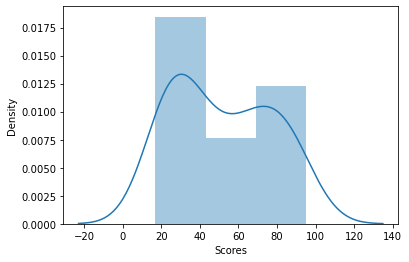

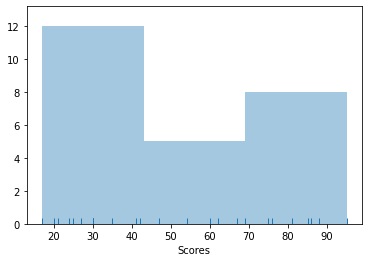

In [12]:
sns.distplot(data['Scores'])
plt.show()

sns.distplot(data['Scores'],kde=False,rug=True)
plt.show()

## Performing Simple Linear Regression

### Calculating the coefficient of the simple linear regression equation: y=B0+B1.x

In [13]:
mean_x=np.mean(data['Hours'])
mean_y=np.mean(data['Scores'])
num=0
den=0
x=list(data['Hours'])
y=list(data['Scores'])
for i in range(len(data)):
    num+=(x[i]-mean_x)*(y[i]-mean_y)
    den+=(x[i]-mean_x)**2
B1=num/den

In [14]:
B1

9.775803390787475

In [15]:
B0=mean_y-B1*mean_x

In [16]:
B0

2.4836734053731746

In [17]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Make Predictions

In [26]:
data['Predicted_Scores']=B0+B1*data['Hours']

In [27]:
data.head()

,Hours,Scores,Predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


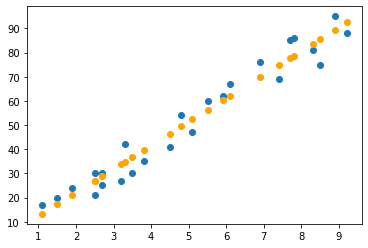

In [29]:
plt.scatter(data['Hours'],data['Scores'])
plt.scatter(data['Hours'],data['Predicted_Scores'],color='orange')
plt.show()

### What will be the Predicted Score if a student studies for 9.25hrs/day?

In [30]:
B0+B1*9.25

92.90985477015732

In [31]:
y=list(data['Scores'].values)
y_pred=list(data['Predicted_Scores'].values)

## RMSE

In [32]:
s=sum([(y_pred[i]-y[i])**2 for i in range(len(data))])
rmse=(np.sqrt(s/len(data)))/mean_y

In [33]:
rmse

0.10439521325937494